# Neural Network Demo

### Dependencies and data

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

%matplotlib inline

/Users/tribui/miniconda3/envs/minds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tribui/miniconda3/envs/minds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tribui/miniconda3/envs/minds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tribui/miniconda3/envs/minds/lib/pyt

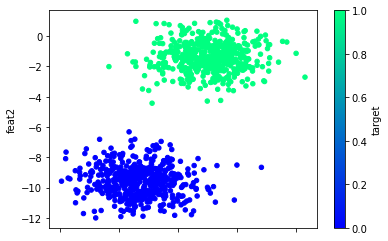

In [2]:
# Create data
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=2)
df = pd.DataFrame(X, columns=['feat1', 'feat2'])
df['target'] = y

# Plot data
df.plot(kind='scatter', x='feat1', y='feat2', c='target', colormap='winter')
plt.show()

In [3]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

In [4]:
# Scale values
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=['feat1', 'feat2'])
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=['feat1', 'feat2'])
X_train_scaled.head()

,feat1,feat2
0,-0.458195,-0.993706
1,2.520789,1.201318
2,1.096509,0.896136
3,0.960125,1.145618
4,-0.720635,-1.189489


### Sequential neural network

In [5]:
# Sequential NN model
nn = tf.keras.models.Sequential()

# Add input layer with 2 features and 1st hidden layer with 1 neuron
in_layer = tf.keras.layers.Dense(units=1, activation='relu', input_dim=2)
nn.add(in_layer)

# Add output layer
out_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')
nn.add(out_layer)

# Show model structure
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
